In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [236]:
df = pd.read_csv("../Data/water_potability.csv")

In [237]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [238]:
df.shape

(3276, 10)

In [239]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [240]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [242]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [243]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [244]:
df['Potability'].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

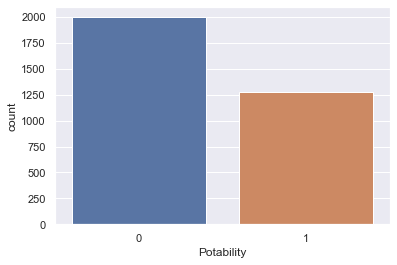

In [245]:
sns.countplot(df['Potability'])

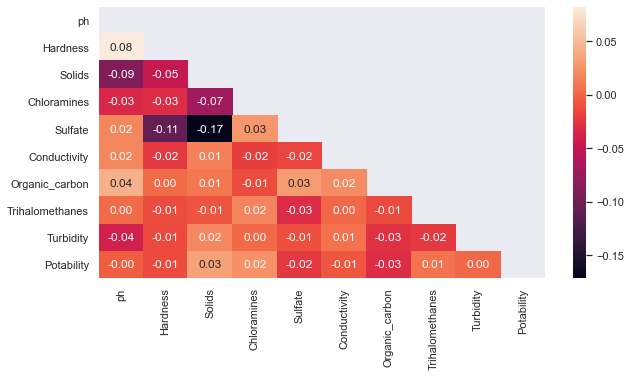

In [246]:
corr = df.corr()
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, fmt=".2f", annot=True, mask=mask)

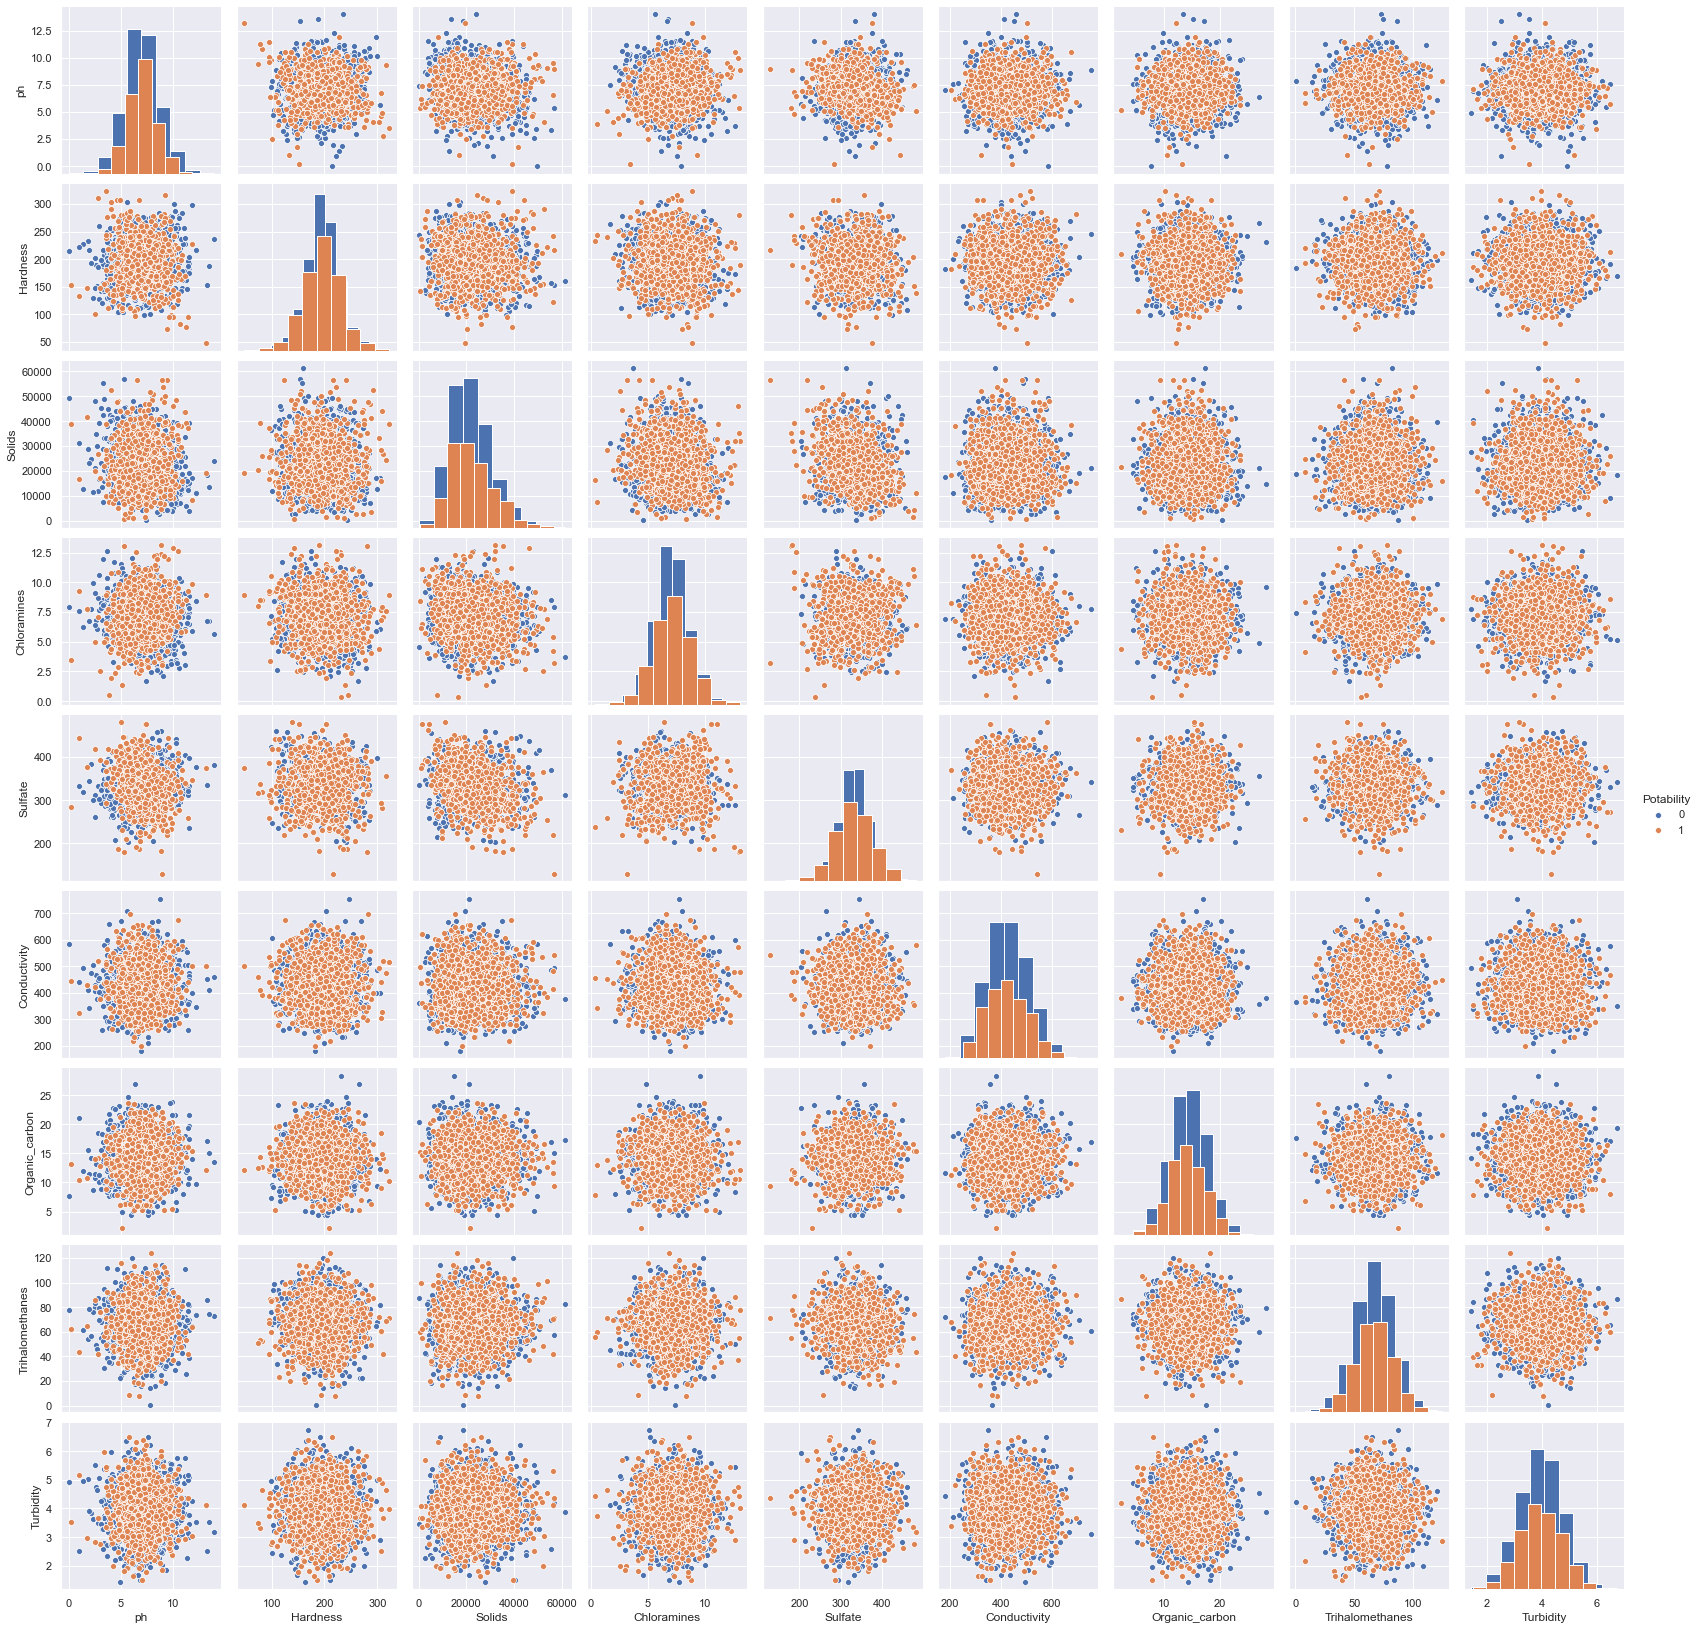

In [247]:
sns.pairplot(data=df, hue="Potability", diag_kind="hist")

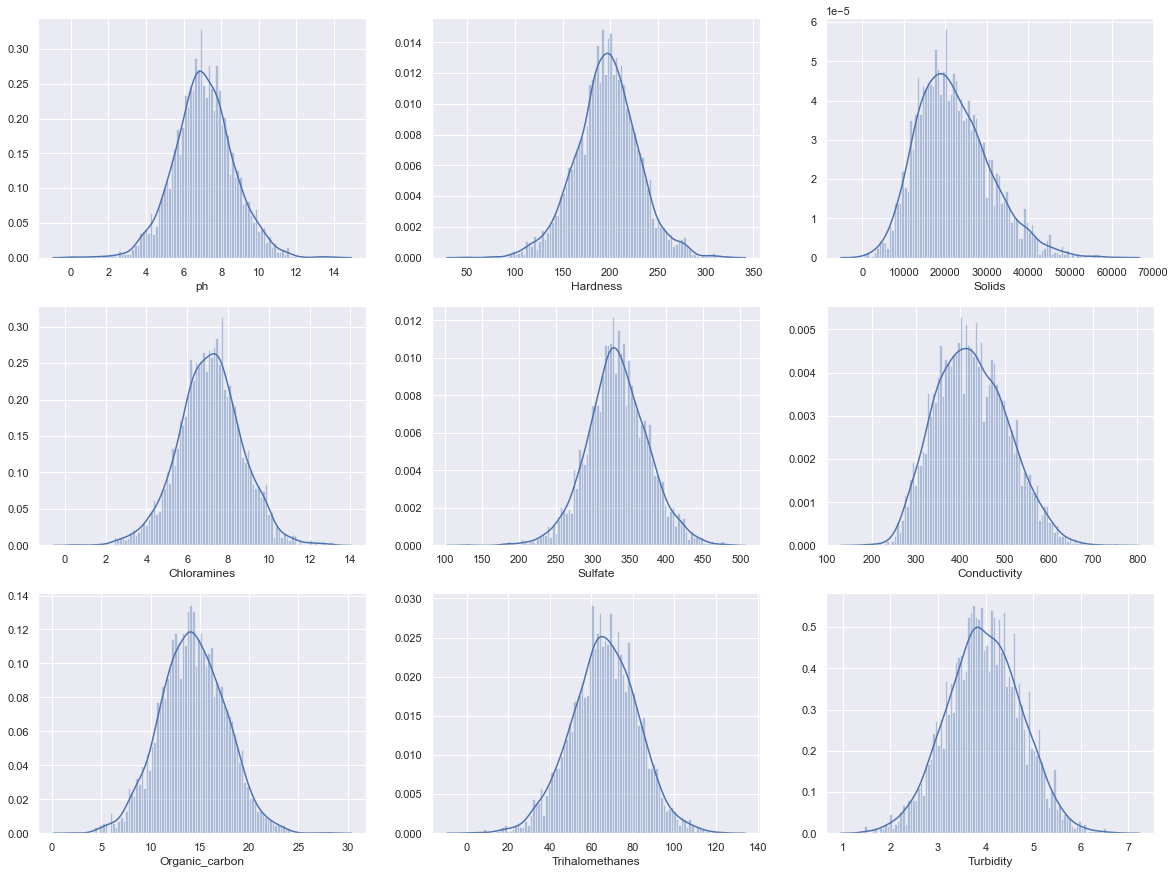

In [248]:
plt.figure(figsize=(20,15))

for i, coluna in enumerate(df.drop(columns='Potability').columns, 1):
    plt.subplot(3,3,i)
    plt.grid(True)
    sns.distplot(df[coluna], bins = 100)

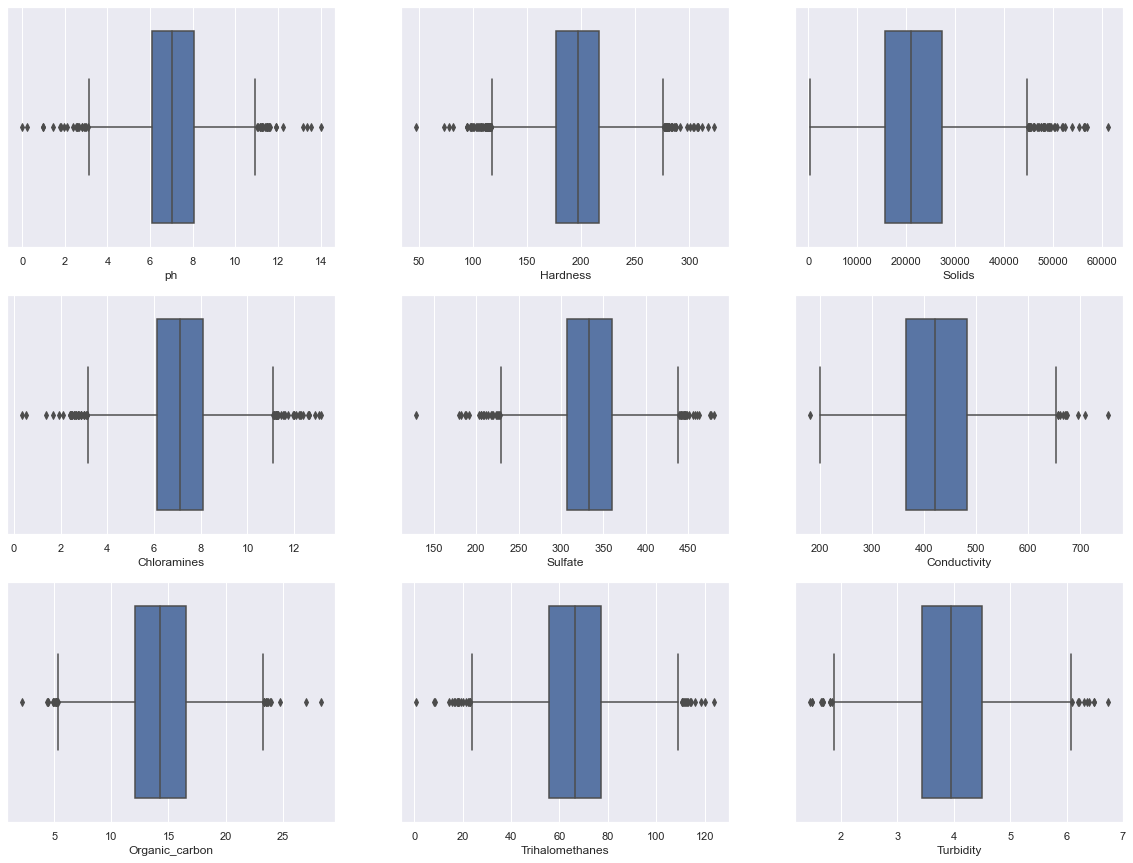

In [249]:
plt.figure(figsize=(20,15))

for i, coluna in enumerate(df.drop(columns='Potability').columns, 1):
    plt.subplot(3,3,i)
    plt.grid(True)
    sns.boxplot(df[coluna])

In [250]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [251]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [253]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [254]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-8.46038683e-15,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [256]:
X_train.shape, y_train.shape

((2293, 9), (2293,))

# Regressão Logistica

In [257]:
lr = LogisticRegression(random_state=42, n_jobs=20, max_iter=120)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

0.6286876907426246


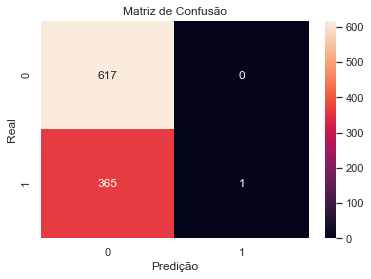

In [258]:
lr_ac = accuracy_score(y_test, lr_pred)
print(lr_ac)
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt = "d").set(xlabel = "Predição", ylabel = "Real", 
                                                                             title = "Matriz de Confusão")
plt.show()

In [259]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       1.00      0.00      0.01       366

    accuracy                           0.63       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.63      0.49       983



# Árvore de Decisão

0.6490335707019329


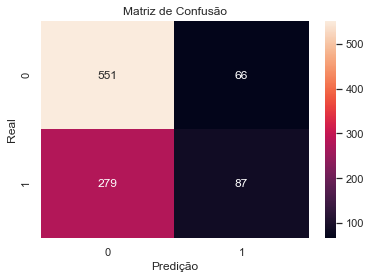

In [261]:
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_ac = accuracy_score(y_test, dt_pred)
print(dt_ac)
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt = "d").set(xlabel = "Predição", ylabel = "Real", 
                                                                             title = "Matriz de Confusão")
plt.show()

In [262]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       617
           1       0.57      0.24      0.34       366

    accuracy                           0.65       983
   macro avg       0.62      0.57      0.55       983
weighted avg       0.63      0.65      0.60       983



# Floresta Aleatória

0.688708036622584


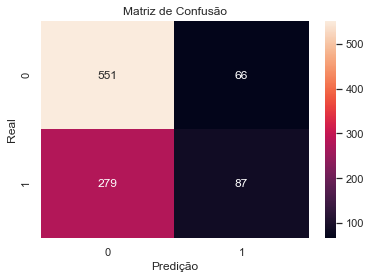

In [264]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_ac = accuracy_score(y_test, rf_pred)
print(rf_ac)
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt = "d").set(xlabel = "Predição", ylabel = "Real", 
                                                                             title = "Matriz de Confusão")
plt.show()

In [265]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       617
           1       0.65      0.36      0.46       366

    accuracy                           0.69       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.68      0.69      0.66       983



# K vizinhos mais próximos

0.6276703967446592


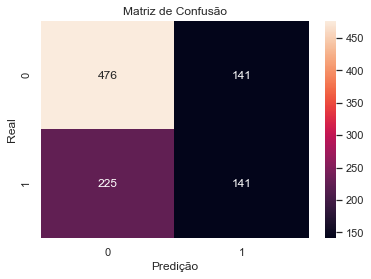

In [267]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_ac = accuracy_score(y_test, knn_pred)
print(knn_ac)
sns.heatmap(confusion_matrix(y_test, knn_pred), fmt="d", annot=True).set(xlabel = "Predição", ylabel = "Real",
                                                                        title = "Matriz de Confusão")
plt.show()

In [268]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       617
           1       0.50      0.39      0.44       366

    accuracy                           0.63       983
   macro avg       0.59      0.58      0.58       983
weighted avg       0.61      0.63      0.62       983



## Máquina de vetores suporte

0.6927772126144456


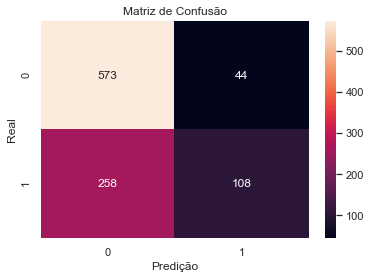

In [270]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_ac = accuracy_score(y_test, svc_pred)
print(svc_ac)
sns.heatmap(confusion_matrix(y_test, svc_pred), fmt="d", annot=True).set(xlabel="Predição",
                                                                        ylabel = "Real",
                                                                        title = 'Matriz de Confusão')
plt.show()

In [271]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79       617
           1       0.71      0.30      0.42       366

    accuracy                           0.69       983
   macro avg       0.70      0.61      0.60       983
weighted avg       0.70      0.69      0.65       983



# XGBoost

[15:21:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6632756866734486


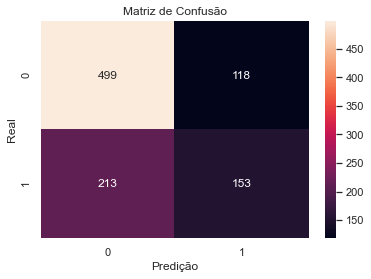

In [273]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_ac = accuracy_score(y_test, xgb_pred)
print(xgb_ac)
sns.heatmap(confusion_matrix(y_test, xgb_pred), fmt = "d", annot=True).set(xlabel="Predição",
                                                                        ylabel = "Real",
                                                                        title = 'Matriz de Confusão')
plt.show()

In [274]:
print(classification_report(y_test, xgb_pred, digits=3))

              precision    recall  f1-score   support

           0      0.701     0.809     0.751       617
           1      0.565     0.418     0.480       366

    accuracy                          0.663       983
   macro avg      0.633     0.613     0.616       983
weighted avg      0.650     0.663     0.650       983



# AdaBoost

0.6286876907426246


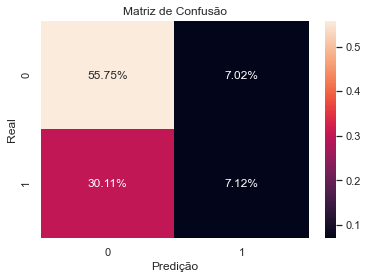

In [276]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
ab_ac = accuracy_score(y_test, ab_pred)
print(ab_ac)
cm = confusion_matrix(y_test, ab_pred)
sns.heatmap(cm/cm.sum(), fmt=".2%", annot=True).set(xlabel="Predição", ylabel = "Real",
                                                    title = 'Matriz de Confusão')
plt.show()

In [277]:
modelo = {"Modelo":["Logistic Regression", "Decision Tree", "Random Forest", "Kneighbors", "SVM", "XGBoost", "AdaBoost"],
         "Acurácia": [lr_ac, dt_ac, rf_ac, knn_ac, svc_ac, xgb_ac, ab_ac]}

In [278]:
modelos = pd.DataFrame(modelo)
modelos

,Modelo,Acurácia
0,Logistic Regression,0.628688
1,Decision Tree,0.649034
2,Random Forest,0.688708
3,Kneighbors,0.627670
4,SVM,0.692777
5,XGBoost,0.663276
6,AdaBoost,0.628688


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

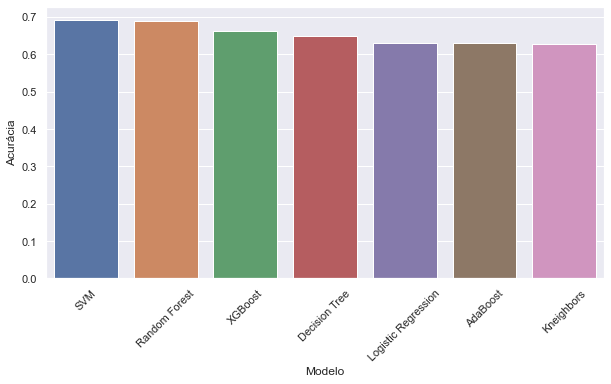

In [285]:
plt.figure(figsize=(10,5))
sns.barplot(x = "Modelo", y = "Acurácia", 
            data=modelos.sort_values(by = "Acurácia", ascending=False))
plt.xticks(rotation = 45)